<a href="https://colab.research.google.com/github/Thrishasivasakthi/python/blob/main/traffic%20sign%20classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sthrisha","key":"61024a08a72e9ab0defae43745b9d465"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 97% 594M/612M [00:04<00:00, 160MB/s]
100% 612M/612M [00:04<00:00, 152MB/s]


In [ ]:
! unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [16]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [17]:
data_dir = "/content/gtsrb-german-traffic-sign"
train_path = '/content/Train'
test_path = '/content/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [18]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [19]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

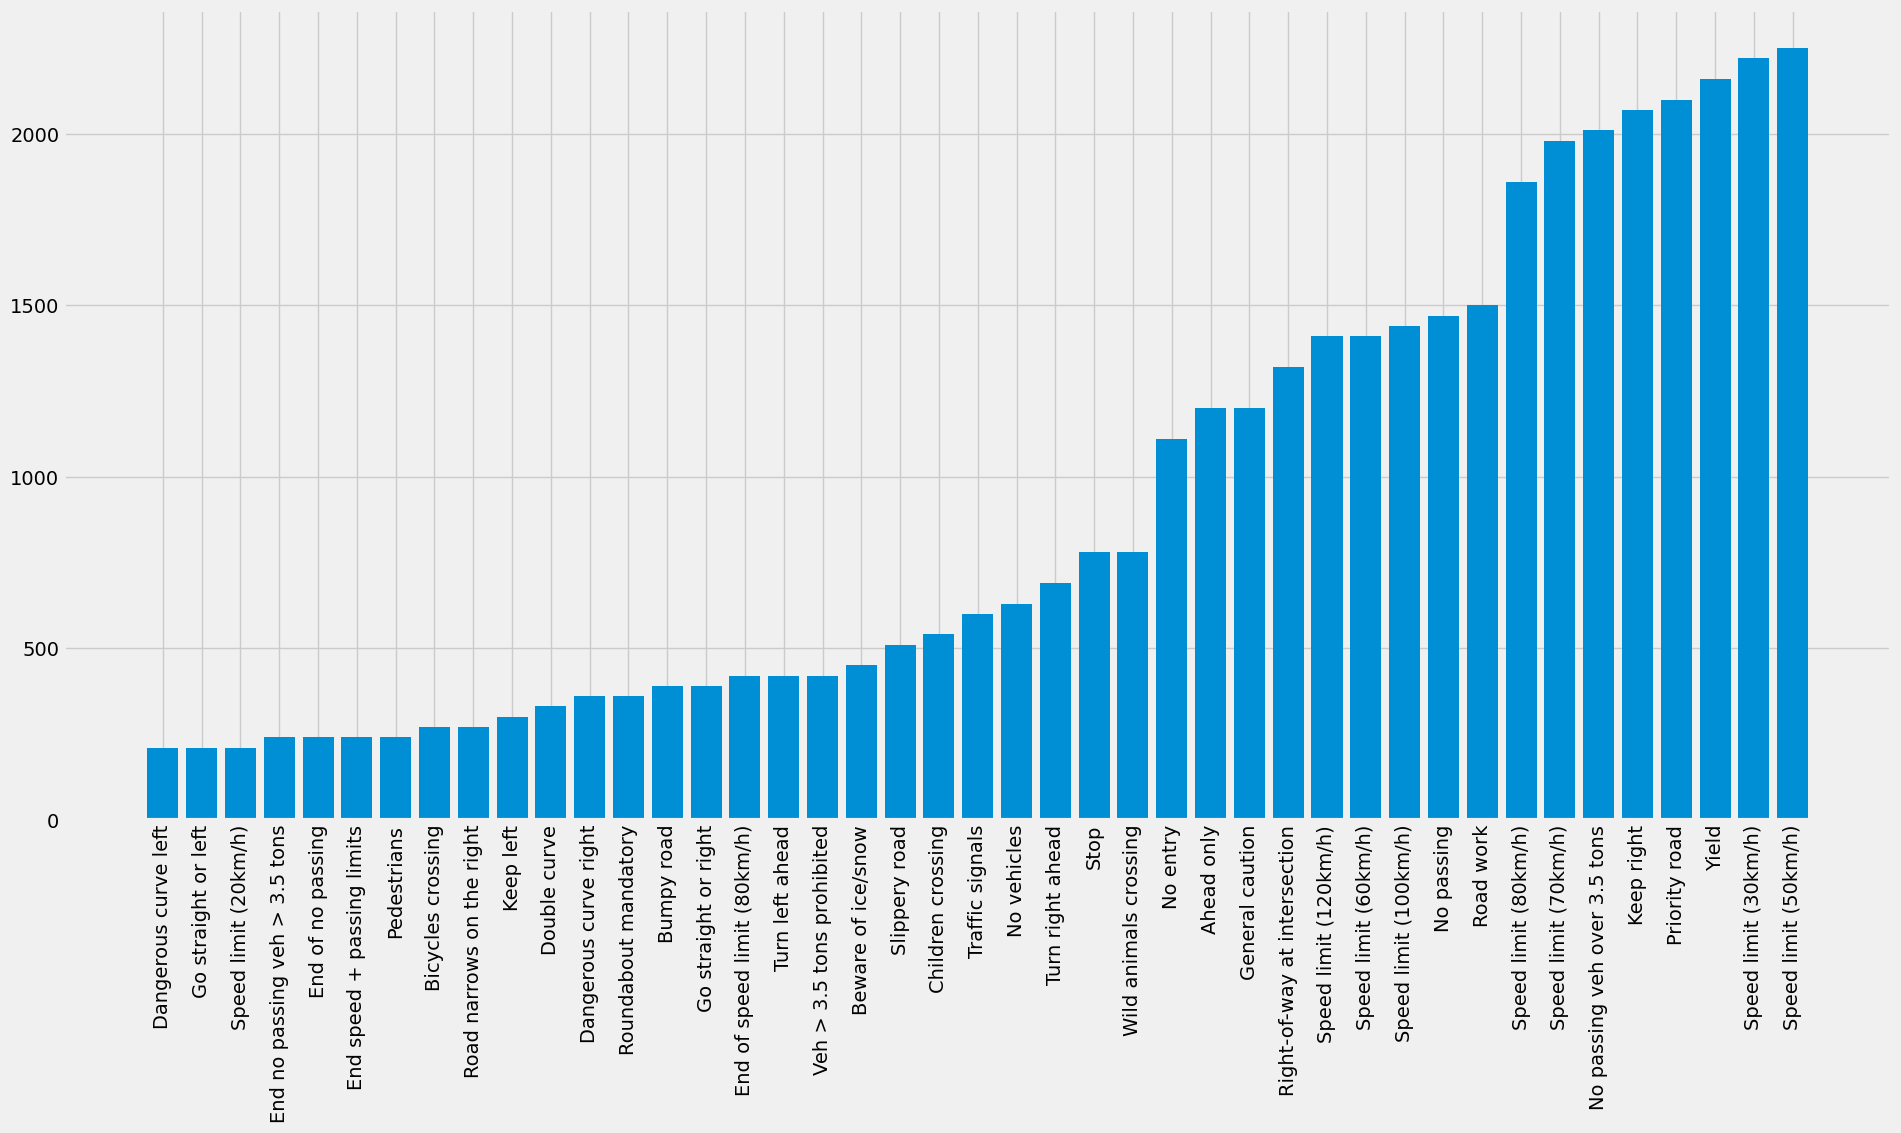

In [20]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()


In [41]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = 'Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)


(39209, 30, 30, 3) (39209,)


In [42]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]


In [43]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [44]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)


(27446, 43)
(11763, 43)


In [45]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation='softmax')
])

In [47]:
lr = 0.001
epochs = 30

opt = Adam(lr=lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [48]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 108s 124ms/step - loss: 1.0917 - accuracy: 0.7070 - val_loss: 0.1252 - val_accuracy: 0.9648
Epoch 2/30
858/858 [==============================] - 109s 127ms/step - loss: 0.1733 - accuracy: 0.9463 - val_loss: 0.0646 - val_accuracy: 0.9791
Epoch 3/30
858/858 [==============================] - 106s 124ms/step - loss: 0.1079 - accuracy: 0.9675 - val_loss: 0.0173 - val_accuracy: 0.9949
Epoch 4/30
858/858 [==============================] - 109s 126ms/step - loss: 0.0870 - accuracy: 0.9725 - val_loss: 0.0458 - val_accuracy: 0.9861
Epoch 5/30
858/858 [==============================] - 105s 122ms/step - loss: 0.0753 - accuracy: 0.9763 - val_loss: 0.1320 - val_accuracy: 0.9603
Epoch 6/30
858/858 [==============================] - 104s 121ms/step - loss: 0.0701 - accuracy: 0.9778 - val_loss: 0.0249 - val_accuracy: 0.9919
Epoch 7/30
858/858 [==============================] - 106s 123ms/step - loss: 0.0566 - accuracy: 0.9824 - val_loss: 0.0101 -

In [54]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
model.save_weights("/content/drive/MyDrive/Colab_Notebook/TSF/Traffic_sign_classification/output")

In [71]:
dir(aug)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_validation_split',
 'apply_transform',
 'brightness_range',
 'channel_axis',
 'channel_shift_range',
 'col_axis',
 'cval',
 'data_format',
 'dtype',
 'featurewise_center',
 'featurewise_std_normalization',
 'fill_mode',
 'fit',
 'flow',
 'flow_from_dataframe',
 'flow_from_directory',
 'get_random_transform',
 'height_shift_range',
 'horizontal_flip',
 'interpolation_order',
 'mean',
 'preprocessing_function',
 'random_transform',
 'rescale',
 'rotation_range',
 'row_axis',
 'samplewise_center',
 'samplewise_std_normalization',
 'shear_range',
 'standardize',
 'std',
 'vertica

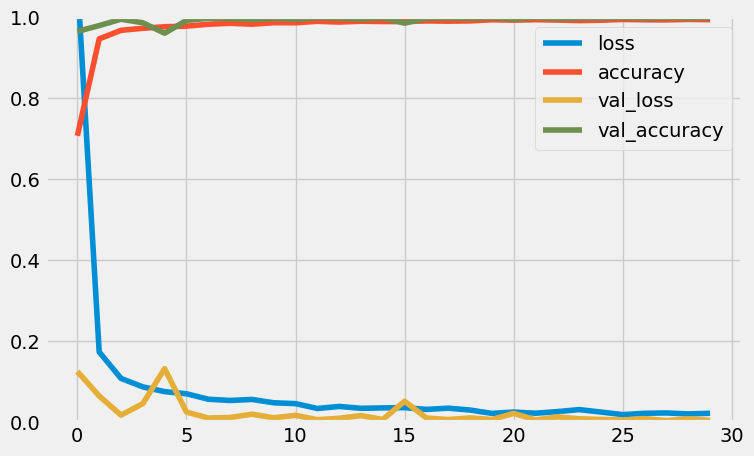

In [72]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [85]:
def generate_alert(predicted_class):
    # Alert mapping based on traffic sign classes
    alert_mapping = {
        "Speed limit (20km/h)": "Normal",
        "Speed limit (30km/h)": "Normal",
        "Speed limit (50km/h)": "Normal",
        "Speed limit (60km/h)": "Warning",
        "Speed limit (70km/h)": "Warning",
        "Speed limit (80km/h)": "Warning",
        "End of speed limit (80km/h)": "Normal",
        "Speed limit (100km/h)": "Warning",
        "Speed limit (120km/h)": "Warning",
        "No passing": "Danger",
        "No passing veh over 3.5 tons": "Danger",
        "Right-of-way at intersection": "Danger",
        "Priority road": "Normal",
        "Yield": "Normal",
        "Stop": "Danger",
        "No vehicles": "Normal",
        "Veh > 3.5 tons prohibited": "Danger",
        "No entry": "Danger",
        "General caution": "Warning",
        "Dangerous curve left": "Warning",
        "Dangerous curve right": "Warning",
        "Double curve": "Warning",
        "Bumpy road": "Warning",
        "Slippery road": "Warning",
        "Road narrows on the right": "Warning",
        "Road work": "Warning",
        "Traffic signals": "Normal",
        "Pedestrians": "Danger",
        "Children crossing": "Danger",
        "Bicycles crossing": "Danger",
        "Beware of ice/snow": "Warning",
        "Wild animals crossing": "Danger",
        "End speed + passing limits": "Normal",
        "Turn right ahead": "Normal",
        "Turn left ahead": "Normal",
        "Ahead only": "Normal",
        "Go straight or right": "Normal",
        "Go straight or left": "Normal",
        "Keep right": "Normal",
        "Keep left": "Normal",
        "Roundabout mandatory": "Normal",
        "End of no passing": "Normal",
        "End no passing veh > 3.5 tons": "Normal"
    }

    alert_class = alert_mapping.get(predicted_class, "Normal")

    if alert_class == "Normal":
        print("No alert needed.")
    elif alert_class == "Warning":
        # Implement warning alert logic (e.g., visual or audio warning)
        print("Warning: Traffic sign indicates caution!")
    elif alert_class == "Danger":
        # Implement danger alert logic (e.g., emergency stop, loud audio)
        print("Danger: Stop immediately!")



test = pd.read_csv('/content/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread( '/content' + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis = -1)
for predicted_class_index in pred_classes:
    predicted_class = classes[predicted_class_index]
    generate_alert(predicted_class)
#Accuracy with the test data
accuracy = accuracy_score(labels, pred_classes)
print('Test Data accuracy: {:.2f}%'.format(accuracy * 100))
#print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Streaming output truncated to the last 5000 lines.
No alert needed.
No alert needed.
No alert needed.
No alert needed.
No alert needed.
No alert needed.
No alert needed.
No alert needed.
Danger: Stop immediately!
Danger: Stop immediately!
No alert needed.
Danger: Stop immediately!
No alert needed.
No alert needed.
Danger: Stop immediately!
Danger: Stop immediately!
No alert needed.
No alert needed.
No alert needed.
No alert needed.
Danger: Stop immediately!
No alert needed.
No alert needed.
Danger: Stop immediately!
No alert needed.
No alert needed.
No alert needed.
No alert needed.
Danger: Stop immediately!
Danger: Stop immediately!
No alert needed.
No alert needed.
Danger: Stop immediately!
Danger: Stop immediately!
No alert needed.
No alert needed.
No alert needed.
No alert needed.
No alert needed.
No alert needed.
No alert needed.
No alert needed.
No alert needed.
No alert needed.
No alert needed.
No alert needed.
Danger: Stop immediately!
Danger: Stop immediately!
No alert needed.

In [79]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred_classes)

<Axes: >

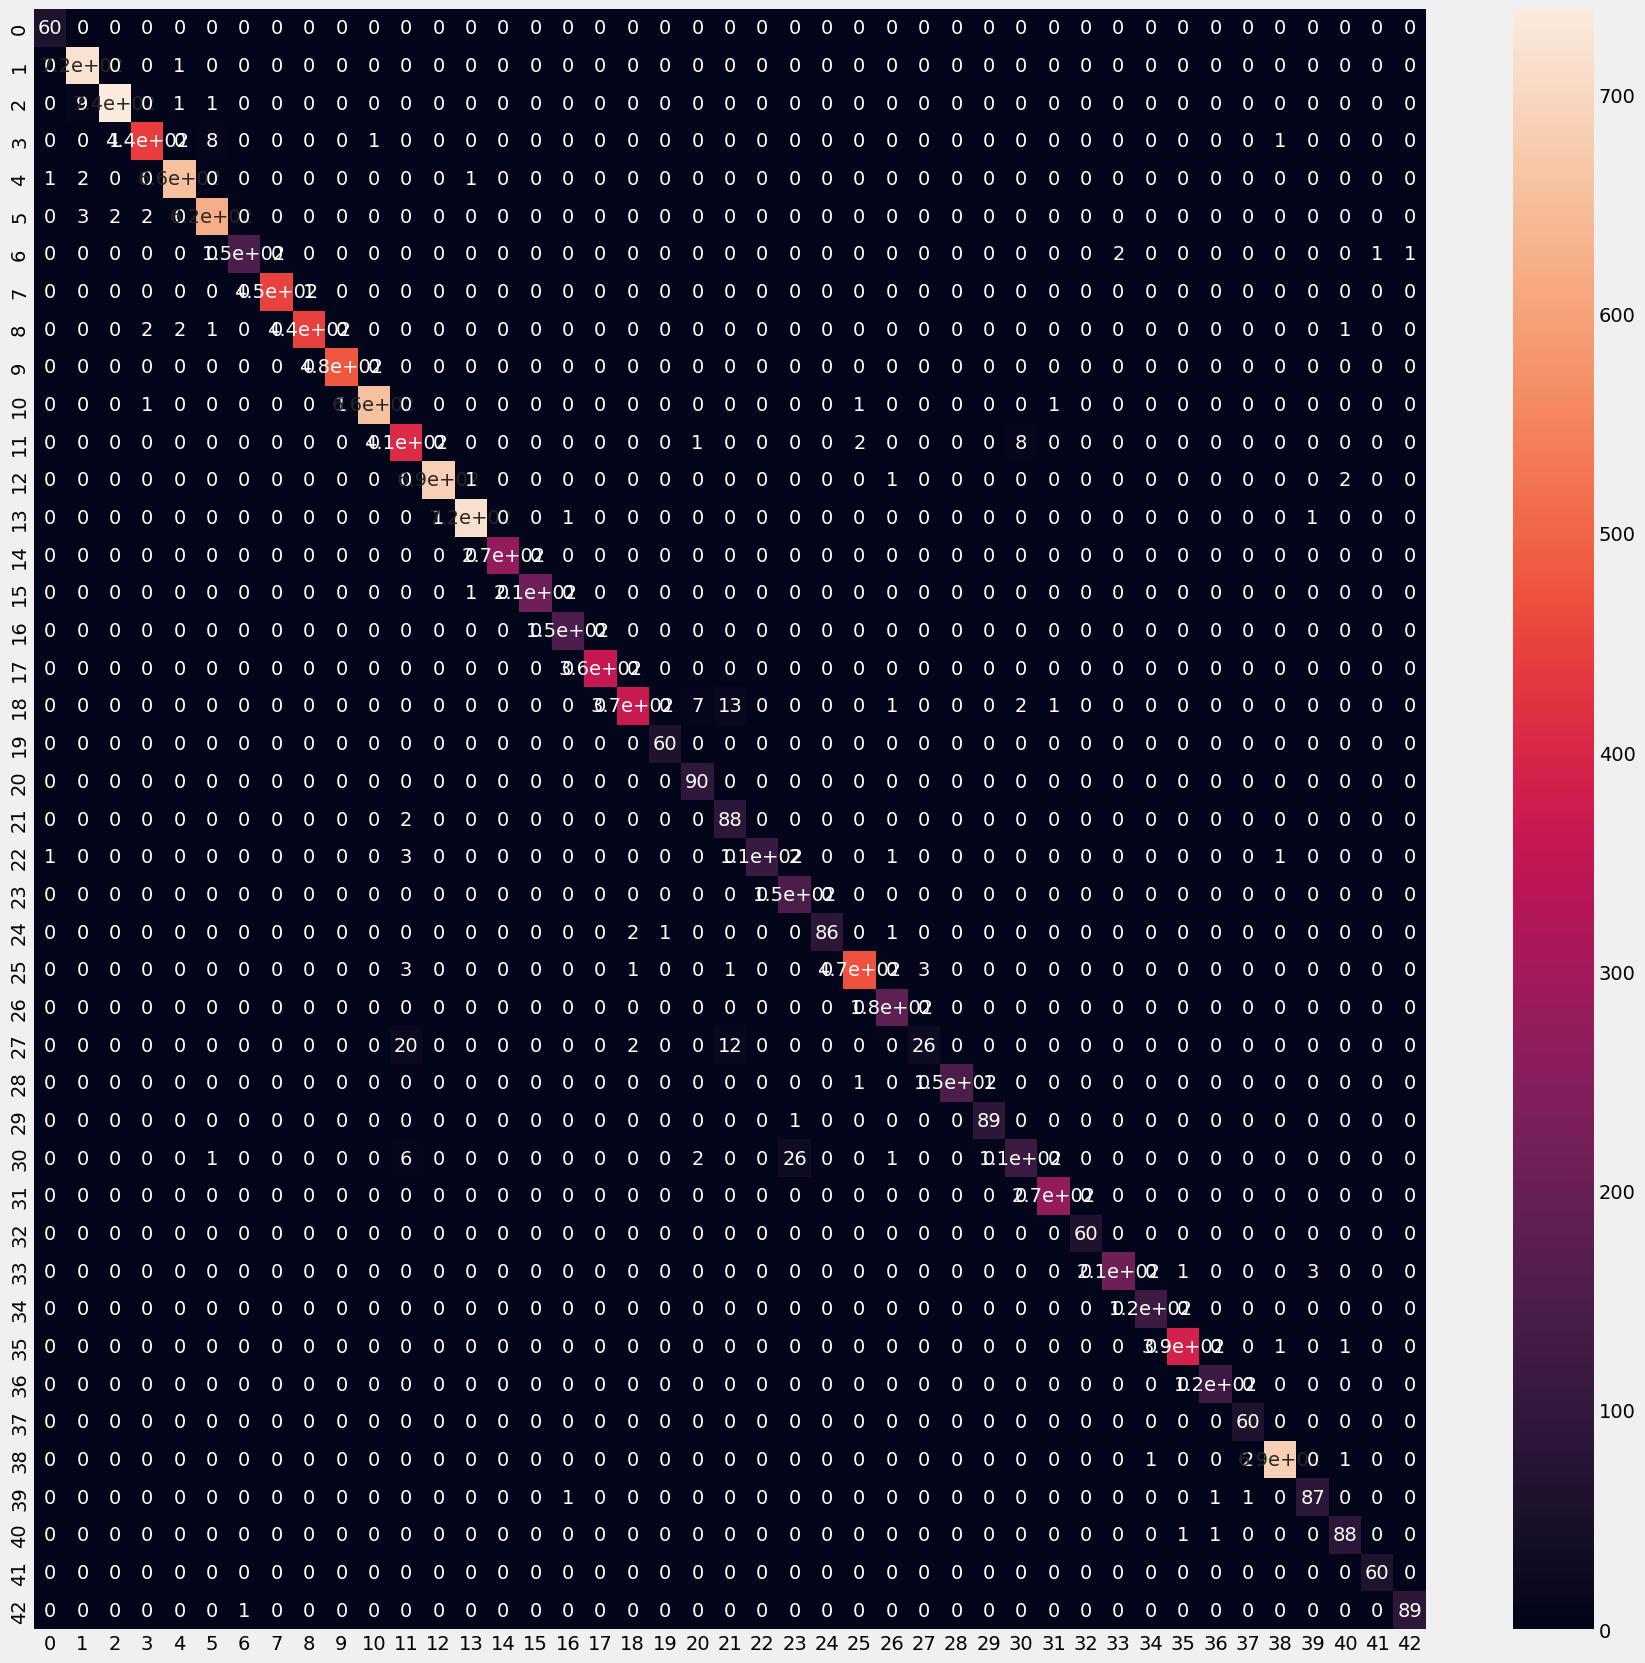

In [80]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [81]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred_classes))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       0.98      1.00      0.99       720
           2       1.00      0.99      0.99       750
           3       0.99      0.98      0.98       450
           4       0.99      0.99      0.99       660
           5       0.98      0.99      0.99       630
           6       0.99      0.97      0.98       150
           7       1.00      1.00      1.00       450
           8       1.00      0.99      0.99       450
           9       1.00      1.00      1.00       480
          10       1.00      0.99      1.00       660
          11       0.92      0.97      0.95       420
          12       1.00      0.99      1.00       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       0.99      1.00      0.99       150
          17       1.00    

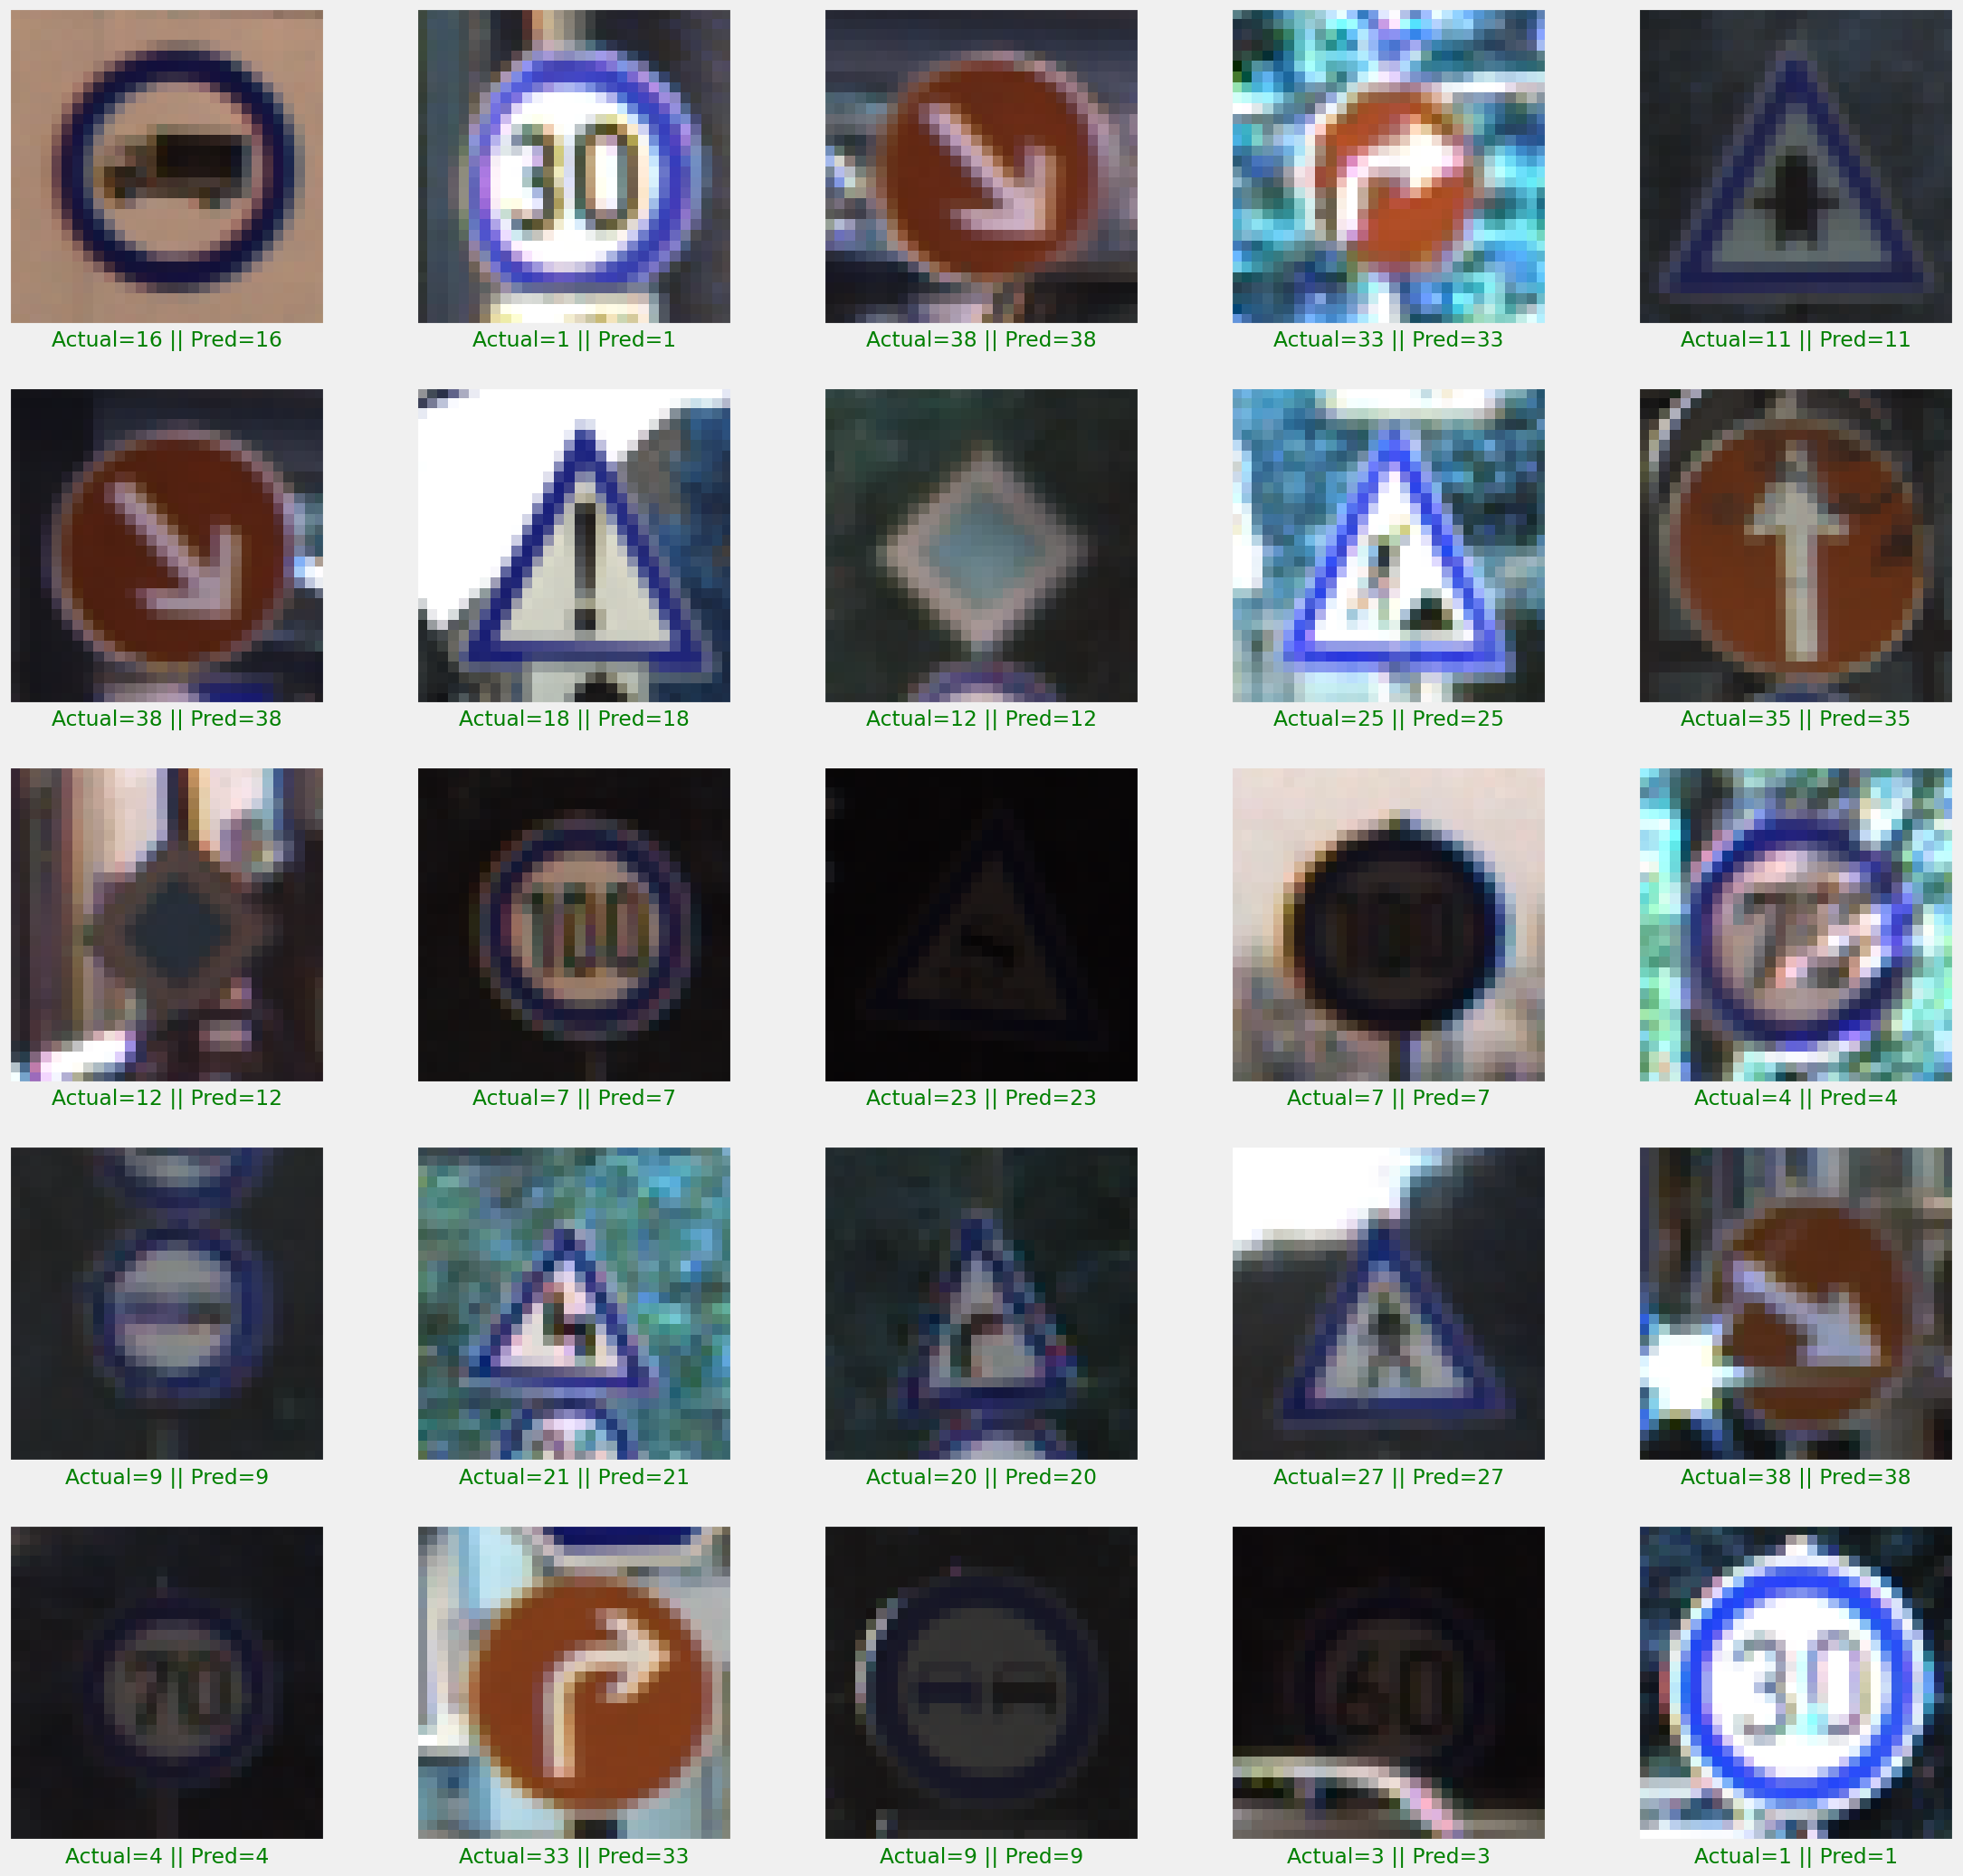

In [83]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred_classes[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()